# <font style="color:rgb(50,120,229)">Overview</font>
In this section, we will learn about some basic operations on images which are used very extensively for any computer vision project. In particular, we will see the following:
1. Copying and creating new images
1. Cropping an image section
1. Resizing an Image
1. Creating binary masks for images

In [1]:
# Import libraries
import cv2
import numpy as np
from dataPath import DATA_PATH
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# <font style="color:rgb(50,120,229)">Create new Images </font>
In the previous section we learnt how to load images from disk. Let us discuss some ways of creating new images or copies of images already there.

In [3]:
# Read image
image = cv2.imread(os.path.join(DATA_PATH,"images/boy.jpg"))

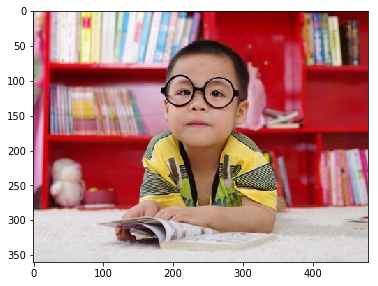

In [4]:
# Let's see what image we are dealing with
plt.imshow(image[:,:,::-1])

### <font style="color:rgb(8,133,37)">Create copy of an Image </font>

In [5]:
# Create a new image by copying the already present image using the copy operation
imageCopy = image.copy()

### <font style="color:rgb(8,133,37)">Create a empty matrix </font>
Let us create an empty matrix with size (100,200).


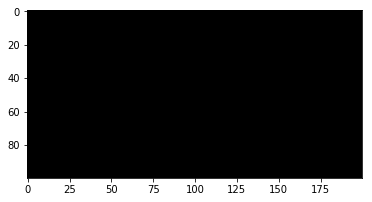

In [6]:
emptyMatrix = np.zeros((100,200,3),dtype='uint8')
plt.imshow(emptyMatrix)

Let's fill it with white pixels

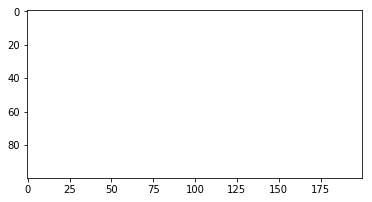

In [7]:
emptyMatrix = 255*np.ones((100,200,3),dtype='uint8')
plt.imshow(emptyMatrix)

### <font style="color:rgb(8,133,37)">Create a empty matrix of the same size as original image </font>
Let us create a matrix with the same size and data type as the original image and fill it with 100. We will use numpy function ones_like to create a new matrix filled with ones. We then multiply it by the desired number to get the final marix.

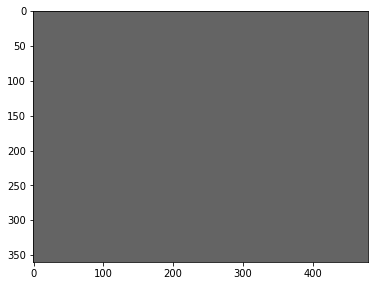

In [8]:
emptyOriginal = 100*np.ones_like(image)
plt.imshow(emptyOriginal)

# <font style = "color:rgb(50,120,229)">Cropping an Image section</font>
Cropping, as the name suggests is cutting out a portion from the image. A good example of using image cropping is in the creation of `Memes`, where people crop someone's face and put on top of another etc. We know how to do it in photo editing softwares. Let us see how it can be done using code so that you can do it more intelligently when required.

In [9]:
# Read image
image = cv2.imread(os.path.join(DATA_PATH,"images/boy.jpg"))

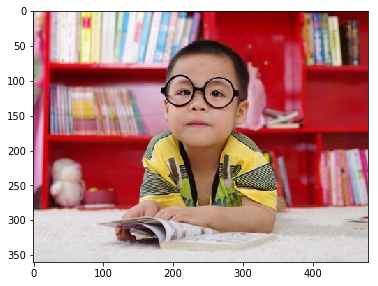

In [10]:
# Let's see what image we are dealing with
plt.imshow(image[:,:,::-1])

Let's crop his face. For that, we need to find the approximate region where the face is present. From the figure, you can see that the face lies somewhere in the region : 

- between row #50 to row #200
- between col #170 to col #320

So, for cropping out this area, we need to select this region from the original matrix and assign it to another variable. This is the cropped out image. `There is no function for doing this, simple python slicing works!`

#### <font style = "color:rgb(200,0,0)">NOTE </font>
In numpy, the first index is for height or row and 2nd one is for width or column. But in OpenCV it is mostly width and height (think of it as opencv talks in terms of (x,y) whereas numpy talks in terms of row and column)

In [11]:
# Crop out a rectangle
# x coordinates = 170 to 320
# y coordinates = 40 to 200
crop = image[40:200,170:320]

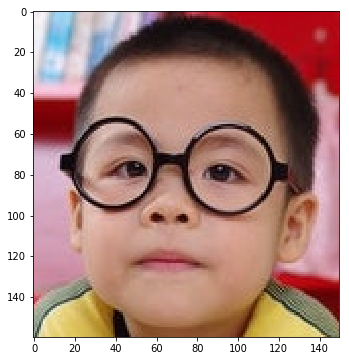

In [12]:
plt.imshow(crop[:,:,::-1])

# <font style="color:rgb(50,120,229)">Copying a Region to another</font>
Once you have cropped a part of image, you can paste it to another image by choosing where you want to paste it. 

`You just need to make sure that the size of rectangle that you cropped is same as the area you want to paste on`

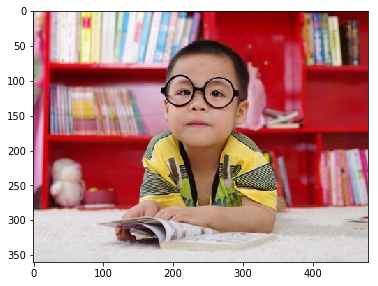

In [13]:
# First let us create a copy of the original image 
copiedImage = image.copy()
plt.imshow(copiedImage[...,::-1])

Let's copy his face to the left and right.

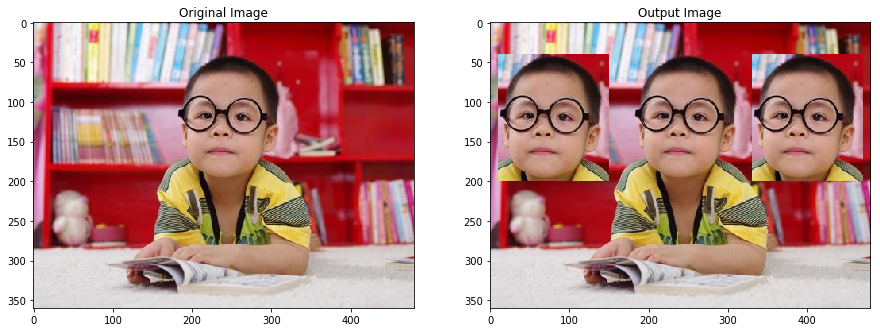

In [14]:
copyRoi = image[40:200,180:320]

# Find height and width of the ROI
roiHeight,roiWidth = copyRoi.shape[:2]

# Copy to left of Face
copiedImage[40:40+roiHeight, 10:10+roiWidth] = copyRoi
# Copy to right of Face
copiedImage[40:40+roiHeight, 330:330+roiWidth] = copyRoi

# Display the output
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(copiedImage[...,::-1]);plt.title("Output Image");

# <font style="color:rgb(50,120,229)">Resizing an Image </font>

We will use [**`cv2.resize`**](https://docs.opencv.org/4.1.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) function for resizing an image.

### <font style = "color:rgb(8,133,37)"> Function Syntax </font>

```python
dst	=	cv2.resize(	src, dsize[, dst[, fx[, fy[, interpolation]]]]	)
```
**Parameters**
- **`src`** - input image
- **`dst`** - output resized image
- **`dsize`** - output image size
- **`fx`** - scale factor along the horizontal axis; 
- **`fy`** - scale factor along the vertical axis; 
Either dsize or both fx and fy must be non-zero.
- **`interpolation`** - interpolation method ( Bilinear / Bicubic etc ). 

Check interpolation flags [here](https://docs.opencv.org/4.1.0/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121) 


There are two ways of using the resize function.
1. Specify width and height of output image explicitly
    > Use the dsize argument to specify the output size in the form (width,height).
2. Specify the scaling factors for resizing ( for both width and height )
    > Use fx and fy arguments to specify the scaling factor for horizontal and vertical axis respectively. It should be a float. The output size is calculated as `𝚂𝚒𝚣𝚎(𝚛𝚘𝚞𝚗𝚍(𝚏𝚡*𝚜𝚛𝚌.𝚌𝚘𝚕𝚜), 𝚛𝚘𝚞𝚗𝚍(𝚏𝚢*𝚜𝚛𝚌.𝚛𝚘𝚠𝚜))`

## <font style="color:rgb(50,120,229)">Method1 - Specify width and height</font>
You have to manually keep track of the aspect ratio of the output image as this method will not preserve the aspect ratio between input and output image.

Let us take an example to see how to use the functions in OpenCV for resizing.

Text(0.5,1,'Scaled Down Image')

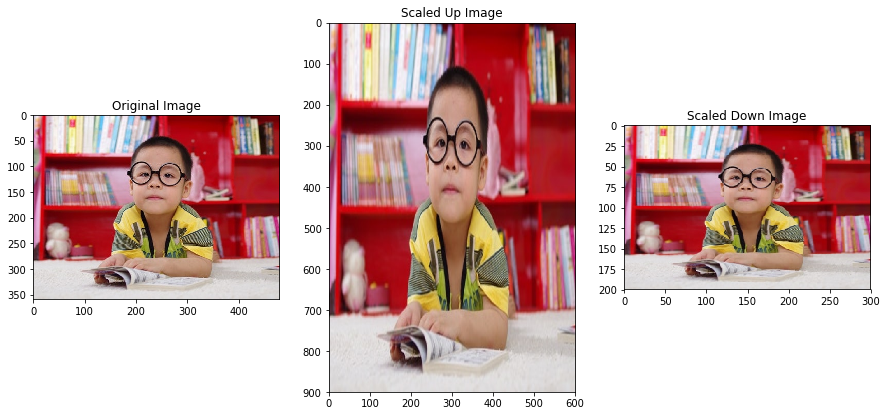

In [15]:
# Set rows and columns
resizeDownWidth = 300
resizeDownHeight = 200
resizedDown = cv2.resize(image, (resizeDownWidth, resizeDownHeight), interpolation= cv2.INTER_LINEAR)

# Mess up with the aspect ratio
resizeUpWidth = 600
resizeUpHeight = 900
resizedUp = cv2.resize(image, (resizeUpWidth, resizeUpHeight), interpolation= cv2.INTER_LINEAR)

plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(132);plt.imshow(resizedUp[:,:,::-1]);plt.title("Scaled Up Image")
plt.subplot(133);plt.imshow(resizedDown[:,:,::-1]);plt.title("Scaled Down Image")

You can see that the output images have been scaled( check the axes )

It is also evident that the aspect ratio for the scaledUp output has been totally ruined. In most cases, it is a good idea to use the scaling factor to resize images. 

## <font style="color:rgb(50,120,229)">Method2 - Specify scaling factor</font>
This method is useful when you want to preserve the aspect ratio of the image. For example, say you have an image of size 400x600 and you want the width to be 360. Then, instead of specifying the height, you can find the scaling factor (i.e 360/600 = 0.6) and use it to resize the image.

In [16]:
# Scaling Down the image 1.5 times by specifying both scaling factors
scaleUpX = 1.5
scaleUpY = 1.5

# Scaling Down the image 0.6 times specifying a single scale factor.
scaleDown = 0.6

scaledDown = cv2.resize(image, None, fx= scaleDown, fy= scaleDown, interpolation= cv2.INTER_LINEAR)

scaledUp = cv2.resize(image, None, fx= scaleUpX, fy= scaleUpY, interpolation= cv2.INTER_LINEAR)

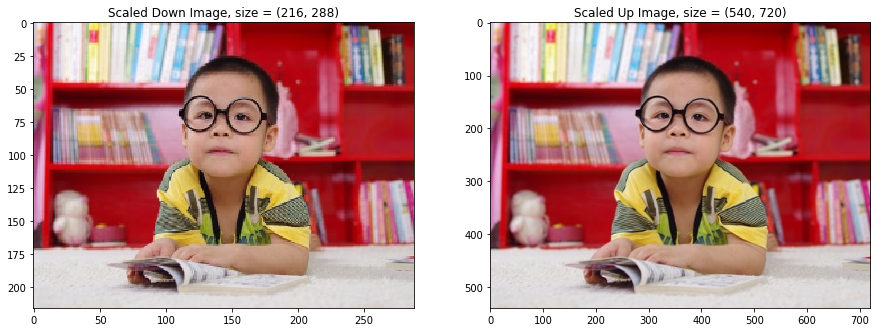

In [17]:
# We can also use the following syntax for displaying image
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(scaledDown[...,::-1]);plt.title("Scaled Down Image, size = {}".format(scaledDown.shape[:2]));
plt.subplot(122);plt.imshow(scaledUp[...,::-1]);plt.title("Scaled Up Image, size = {}".format(scaledUp.shape[:2]));

You can see that the aspect ratio has not been disturbed.

# <font style="color:rgb(50,120,229)">Creating an Image Mask </font>
Masking is a very important step in many image processing and computer vision algorithms. The goal is to segment out the area of interest and apply your algorithm to a specific part of the image. You can perform all operations on this segmented part of the image and put it back on the original image.

## <font style="color:rgb(50,120,229)">Create a mask using coordinates</font>

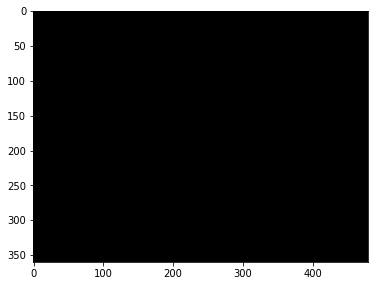

In [18]:
# Create an empty image of same size as the original
mask1 = np.zeros_like(image)
plt.imshow(mask1)

uint8


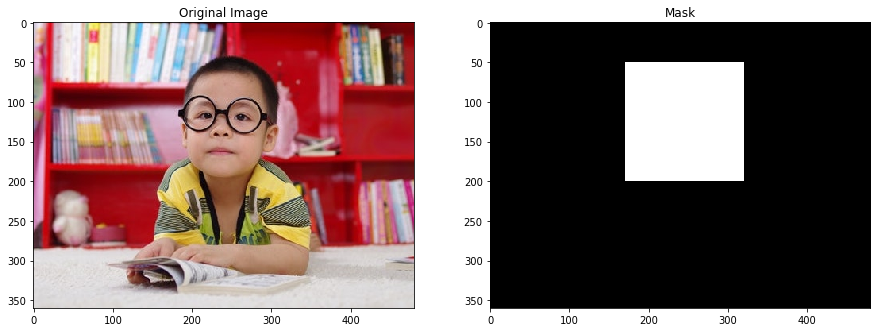

In [19]:
mask1[50:200,170:320] = 255
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(mask1[:,:,::-1]);plt.title("Mask")
print(mask1.dtype)

This is the mask for the face region of the input image

## <font style="color:rgb(50,120,229)">Create a mask using pixel intensity or color</font>
Another way of creating masks is by using some logic. One example is using a simple color information. For example, Let us try to find out the pixels which are approximately red in color.

If we want to focus on `red pixels`, the simplest logic that does the trick is:
```
* The red channel should have high intensity ( keep the range of pixel values from 100 to 255 )
* The other 2 channels should have low intensity ( keep the range of pixel values in Blue and Green channels between 0 to 100)
```
There is a nice OpenCV function which can do exactly this. We will use the opencv function [**`inRange`**](https://docs.opencv.org/4.1.0/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981)

#### <font style = "color:rgb(8,133,37)">Function Syntax</font> 
It finds the pixels which lie in between the specified range. It produces a binary output image in which the white pixels correspond to those pixels in the input image which fall in the specified range. The pixel values which fall outside the specified range are black `(0)`
```Python:
dst	=	cv2.inRange(	src, lowerb, upperb[, dst]	)
```

**Parameters**
- **`src`** - first input array.
- **`lowerb`** - inclusive lower boundary array or a scalar.
- **`upperb`** - inclusive upper boundary array or a scalar.
- **`dst`** - output array of the same size as src and CV_8U type.

It produces a binary image ( pixels are either black or white ).



Text(0.5,1,'Masked Image')

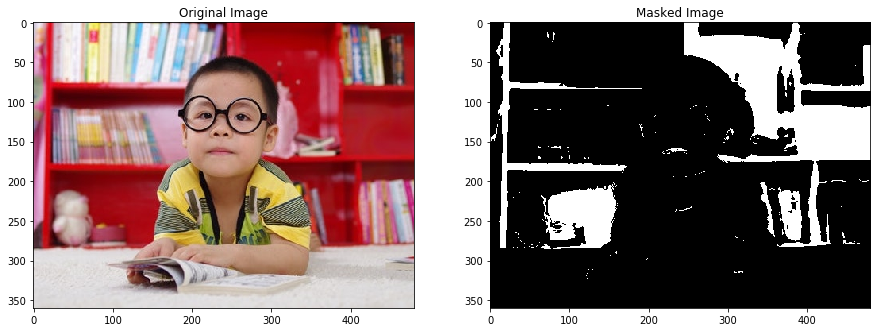

In [20]:
mask2 = cv2.inRange(image, (0,0,150), (100,100,255))
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(mask2);plt.title("Masked Image")

As you can see the white portion in the output mask corresponds to the red pixels in the original image. 

We will discuss more about color based masking in later modules.